# Test: Minimum error discrimination

In this notebook we are testing the evolution of the error probability with the number of evaluations.

In [2]:
import sys 
sys.path.append('../../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState 

plt.style.use('ggplot')

In [3]:
def callback(params, results, prob_error, prob_inc, prob):
    data.append(prob_error)

In [8]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0], [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)
optimal = nnd.helstrom_bound(ψ, ϕ)

print(f'Optimal results: {optimal}\nActual results: {results}')

Optimal results: 0.29294229792309684
Actual results: (array([ 2.42574839, -0.45789599, -0.14651544,  0.01900958,  3.08001315,
       -1.1587735 ,  2.00970182, -0.95517757,  1.82812043, -0.69340082,
        1.93321273]), 0.2880859375, 200)


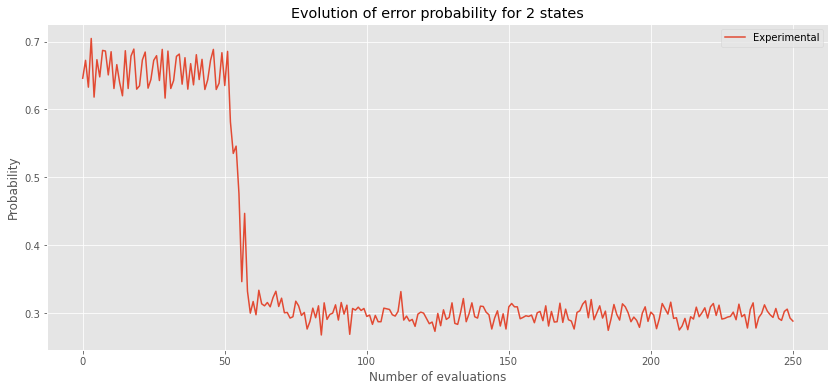

In [9]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 2 states')
plt.show()

In [12]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([ 1.21257337, -0.28883727,  0.88354023,  0.01448225, -0.63311039,
        3.15461241,  0.14751907,  0.9578561 ,  0.17248849,  1.02495098,
       -3.00964727,  0.2462466 ,  1.74318408,  1.93083792,  0.60719944,
       -2.29975985,  1.35326127, -1.95557131, -2.71806421]), 0.3583984375, 200)


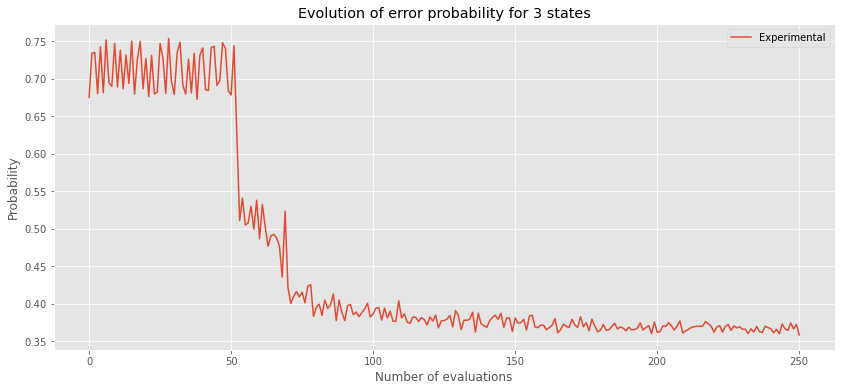

In [13]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 3 states')
plt.show()

In [14]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([-0.89554769,  0.18186896, -0.80965996, -3.22784486,  0.02806972,
        1.25695176,  2.91133987, -2.84804911,  1.03905291, -1.74608792,
       -1.24091733,  2.65670232, -1.44543506, -0.71922813,  2.1140674 ,
       -2.12525525, -1.38197303,  2.15625147,  0.59319961]), 0.49251302083333326, 200)


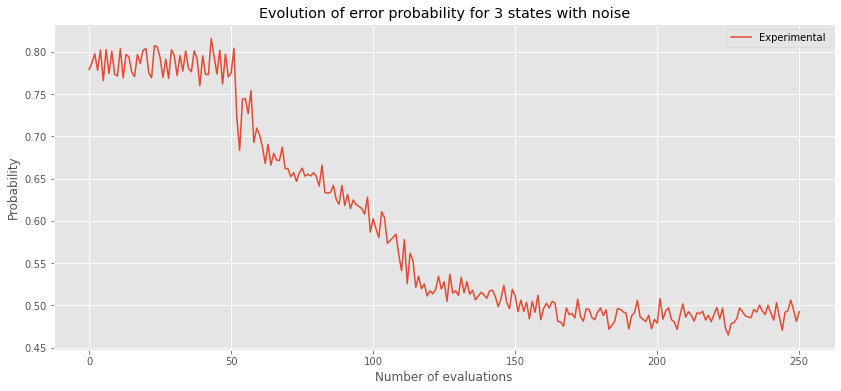

In [15]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 3 states with noise')
plt.show()